# Stock Market Risk Analysis and Prediction

In [44]:
from __future__ import division
import os
import random
import time
from datetime import date
import datetime as datetime
import pandas as pd
import numpy as np
import pandas_datareader as pdr 
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from yahoo_fin import stock_info as si
from collections import deque


## Firstly we will analyse stock data over a specific period of time
### We have already defined 32 major stocks in teh following code snipet

In [2]:
indi_data_ticker_dict={'AAPL':'Apple Inc.','GOOGL':'Alphabet Inc.','MSFT':'Microsoft Corporation','AMZN':'Amazon.com, Inc.','TSLA':'Tesla, Inc.','AMD':'Advanced Micro Devices, Inc.','QCOM':'QUALCOMM Incorporated','GME':'GameStop Corp.','GSPC':'GSPC','IXIC':'NASDAQ Composite','DJI':'Dow Jones Industrial Average','FVX':'Treasury Yield 5 Years','HSI':'HANG SENG INDEX','GDAXI':'DAX PERFORMANCE-INDEX','FCHI':'CAC 40','N225':'Nikkei 225','AXJO':'S&P/ASX 200','CLF':'CRUDE OIL','GCF':'GOLD','SIF':'SILVER','PLF':'Platinum','DXF':'US Dollar','ADF':'Australian Dollar','EURUSDX':'EUR/USD: Dollar in Euros Rate Exchange','USDJPYX':'USD/JPY:Dollar in Japanese Yen Rate Exchange','AUDUSDX':'AUD/USD:Dollar in Australian Dollars','JYF':'Japanese Yen','INRX':'USD/INR: Dollar to Indain Rupees exchange rate','BSESN':'S&P BSE SENSEX','NSEI':'Nifty 50','RELIANCENS':'Reliance Industries Limited'}
hist_ticker_dict={'AAPL':'Apple Inc.','GOOGL':'Alphabet Inc.','MSFT':'Microsoft Corporation','AMZN':'Amazon.com, Inc.','TSLA':'Tesla, Inc.','AMD':'Advanced Micro Devices, Inc.','QCOM':'QUALCOMM Incorporated','GME':'GameStop Corp.','^GSPC':'GSPC','^IXIC':'NASDAQ Composite','^DJI':'Dow Jones Industrial Average','^FVX':'Treasury Yield 5 Years','^HSI':'HANG SENG INDEX','^GDAXI':'DAX PERFORMANCE-INDEX','^FCHI':'CAC 40','^N225':'Nikkei 225','^AXJO':'S&P/ASX 200','CL=F':'CRUDE OIL','GC=F':'GOLD','SI=F':'SILVER','PL=F':'Platinum','DX=F':'US Dollar','AD=F':'Australian Dollar','EURUSD=X':'EUR/USD: Dollar in Euros Rate Exchange','USDJPY=X':'USD/JPY:Dollar in Japanese Yen Rate Exchange','AUDUSD=X':'AUD/USD:Dollar in Australian Dollars','JY=F':'Japanese Yen','INR=X':'USD/INR: Dollar to Indain Rupees exchange rate','^BSESN':'S&P BSE SENSEX','^NSEI':'Nifty 50','RELIANCE.NS':'Reliance Industries Limited'}


In [5]:
print(f'already defined stock dictionary has following stock tinkers {list(hist_ticker_dict.keys())}\n')
repeat=True
while repeat:
    print('If you want to add more stock tinkers input y else n\n')
    choice=input()
    if choice=='y' or choice =='Y':
        stock_tinker=input('enter stock tinker:')
        stock_name=input('enter stock name:')
        hist_ticker_dict[stock_tinker]=stock_name
        indi_data_ticker_dict[stock_tinker]=stock_name
        print('Do you want to add more stocks? if yes print y else n:\n')
        x=input()
        if x=='y' or x=='Y':
            repeat =True
        if x=='n' or x=='N':
            repeat =False
    if choice=='n' or choice =='N':
        repeat =False
all_ticker_list=list(hist_ticker_dict)
data_ticker_list=list(indi_data_ticker_dict)

already defined stock dictionary has following stock tinkers ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'TSLA', 'AMD', 'QCOM', 'GME', '^GSPC', '^IXIC', '^DJI', '^FVX', '^HSI', '^GDAXI', '^FCHI', '^N225', '^AXJO', 'CL=F', 'GC=F', 'SI=F', 'PL=F', 'DX=F', 'AD=F', 'EURUSD=X', 'USDJPY=X', 'AUDUSD=X', 'JY=F', 'INR=X', '^BSESN', '^NSEI', 'RELIANCE.NS']

If you want to add more stock tinkers input y else n

n


### TO RUN THE PROGRAMME FAST, KEEP THE TIME PERIOD SMALL

In [6]:
print('enter the start date and end date of stock\'s historical DATA\n')
for j in range(2):
    if j==0:
        print('first enter the start date:\n ')
        for i in range(3):
            if i==0:
                print('enter year:\n')
                y=int(input())
            if i==1:
                print('enter month:\n')
                m=int(input())
            if i==2:
                print('enter day:\n')
                d=int(input())
        start_date=datetime.datetime(y,m,d)
    if j==1:
        print('first enter the end date:\n ')
        print('Do you want the latest data? then input y else n\n')
        ans=input()
        if ans=='y' or ans=='Y':
            end_date = datetime.datetime.now()
        else:
            for i in range(3):
                if i==0:
                    print('enter year:\n')
                    y=int(input())
                if i==1:
                    print('enter month:\n')
                    m=int(input())
                if i==2:
                    print('enter day:\n')
                    d=int(input())
            end_date=datetime.datetime(y,m,d)
print(f'start date:{start_date} and end date:{end_date}')

enter the start date and end date of stock's historical DATA

first enter the start date:
 
enter year:

2019
enter month:

9
enter day:

2
first enter the end date:
 
Do you want the latest data? then input y else n

Y
start date:2019-09-02 00:00:00 and end date:2020-09-03 23:40:11.910098


# HISTORICAL DATA OF ALL THE TICKERS 
##### All the historical stock data of tickers initiated in the above dictionary will be saved in differnt excel files. 
##### high data, low data, closing data, open data,return data


In [11]:
high_data=pdr.DataReader(all_ticker_list,data_source='yahoo',start=start_date, end=end_date)['High']
low_data=pdr.DataReader(all_ticker_list,data_source='yahoo',start=start_date, end=end_date)['Low']
open_data=pdr.DataReader(all_ticker_list,data_source='yahoo',start=start_date, end=end_date)['Open']
closing_data=pdr.DataReader(all_ticker_list,data_source='yahoo',start=start_date, end=end_date)['Close']
return_data=closing_data.pct_change()

In [12]:
high_data.to_excel('stock_high.xlsx')
low_data.to_excel('stock_low.xlsx')
open_data.to_excel('stock_open.xlsx')
closing_data.to_excel('stock_close.xlsx')
return_data.to_excel('stock_return.xlsx')

## INDIVIDUAL TICKER INFORMATION 
###### USER HAS TO INPUT A PARTICULAR TICKER NAME(ONLY APLHABETS - FROM DATA_TICKER_LIST) AND THEN THE CODE WILL PROVIDE THE USER WITH ALL THE RELATED DETAILS LIKE GRAPH, DESCRIPTION ,AND ETC. 

In [13]:
for (stock,stock_name) in zip(all_ticker_list,data_ticker_list):
    globals()[stock_name] = pdr.DataReader(stock,'yahoo',start_date,end_date)

In [14]:
## choose the ticker name from elements of data_ticker_list only
print(data_ticker_list)
choice='#####'
acceptange_range=data_ticker_list
while choice not in acceptange_range:
    choice=input('enter the ticker name of whom you want to get information:')
    if choice not in acceptange_range:
        print('enter name from shown ticker list only.')
    else:
        pass
stock_name=globals()[choice]

['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'TSLA', 'AMD', 'QCOM', 'GME', 'GSPC', 'IXIC', 'DJI', 'FVX', 'HSI', 'GDAXI', 'FCHI', 'N225', 'AXJO', 'CLF', 'GCF', 'SIF', 'PLF', 'DXF', 'ADF', 'EURUSDX', 'USDJPYX', 'AUDUSDX', 'JYF', 'INRX', 'BSESN', 'NSEI', 'RELIANCENS']
enter the ticker name of whom you want to get information:AMZN


In [15]:
##DATA TABLE OF THE STOCK
stock_name.head(10)
##first 10 rows is shown
## for all rows except last 10 put '-10' instaed of 10

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-09-03,1800.800049,1768.000000,1770.000000,1789.839966,3543000,1789.839966
2019-09-04,1807.630005,1796.229980,1805.000000,1800.619995,2324100,1800.619995
2019-09-05,1842.000000,1815.579956,1821.949951,1840.719971,3310800,1840.719971
2019-09-06,1840.650024,1826.400024,1838.219971,1833.510010,2496900,1833.510010
2019-09-09,1850.000000,1824.609985,1841.000000,1831.349976,2999500,1831.349976
2019-09-10,1825.810059,1805.339966,1822.750000,1820.550049,2613900,1820.550049
2019-09-11,1833.420044,1809.079956,1812.140015,1822.989990,2432800,1822.989990
2019-09-12,1853.660034,1834.280029,1837.630005,1843.550049,2823500,1843.550049
2019-09-13,1846.119995,1835.170044,1842.010010,1839.339966,1971300,1839.339966


In [16]:
# Summery stats of choosen Stock
stock_name.describe()

,High,Low,Open,Close,Volume,Adj Close
count,255.000000,255.000000,255.000000,255.000000,2.550000e+02,255.000000
mean,2249.872235,2195.376470,2222.159458,2224.676430,4.369719e+06,2224.676430
std,535.865968,513.518837,526.054930,525.255420,2.108710e+06,525.255420
min,1725.000000,1626.030029,1641.510010,1676.609985,8.813000e+05,1676.609985
25%,1804.260010,1782.404968,1795.755005,1793.580017,2.896800e+06,1793.580017
50%,1975.000000,1910.000000,1936.000000,1953.949951,3.718100e+06,1953.949951
75%,2516.494995,2464.219971,2488.935059,2490.469971,5.281450e+06,2490.469971
max,3552.250000,3486.689941,3547.000000,3531.449951,1.556730e+07,3531.449951


In [17]:
# General Info
stock_name.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 255 entries, 2019-09-03 to 2020-09-03
Data columns (total 6 columns):
High         255 non-null float64
Low          255 non-null float64
Open         255 non-null float64
Close        255 non-null float64
Volume       255 non-null int64
Adj Close    255 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.9 KB


###### Now that we have seen all the general information of the stock lets plot our data's various columns

Text(0.5, 1.0, 'CLOSING PRICE')

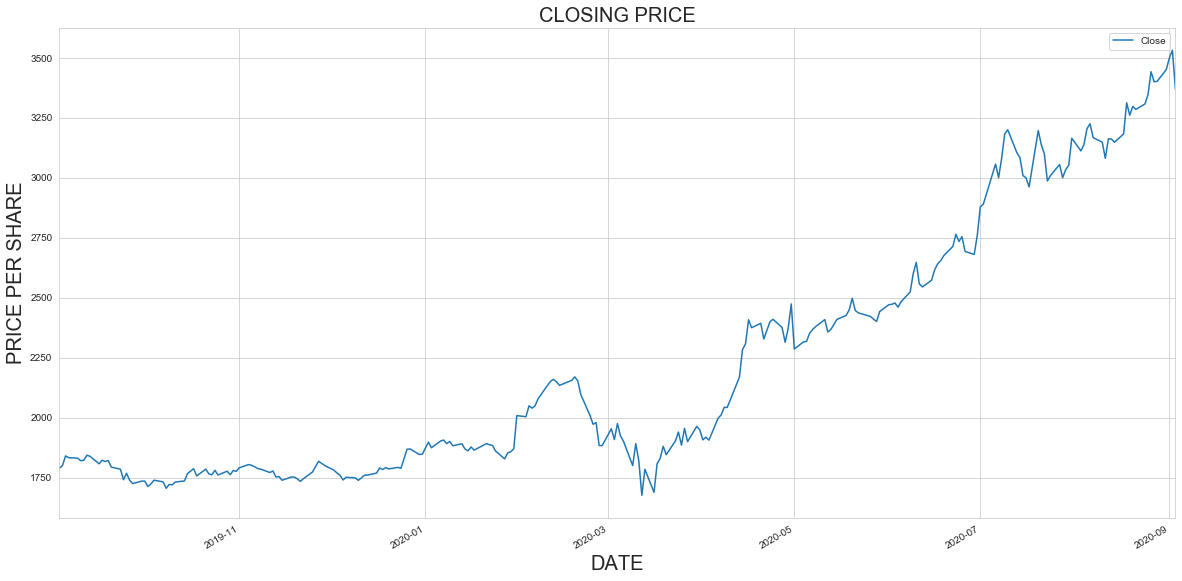

In [18]:
#historical view of closing price of our stock
stock_name['Close'].plot(legend=True,grid='true',figsize=(20,10))
plt.xlabel('DATE',fontsize=20)
plt.ylabel('PRICE PER SHARE',fontsize=20)
plt.title('CLOSING PRICE',fontsize=20)

##### from the above graph we can see that in the span of  given time the growth of stock price has risen exoponentially

Text(0.5, 1.0, 'VOLUME PRICE')

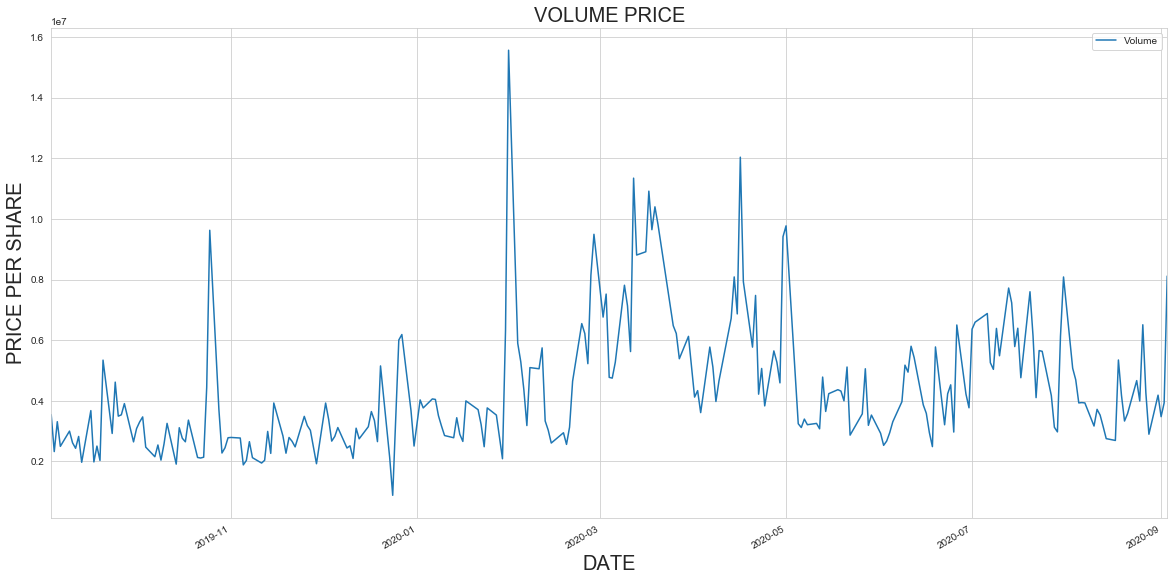

In [19]:
# plot of total volume of stock being traded each day over the past 4 year
stock_name['Volume'].plot(figsize=(20,10),legend=True)
plt.xlabel('DATE',fontsize=20)
plt.ylabel('PRICE PER SHARE',fontsize=20)
plt.title('VOLUME PRICE',fontsize=20)


###### from the graph above we can see that the maximum number of shares were traded on feb 20

### now we will visualise the daily return percentage of the stock

Text(0.5, 1.0, 'DAILY RETURN')

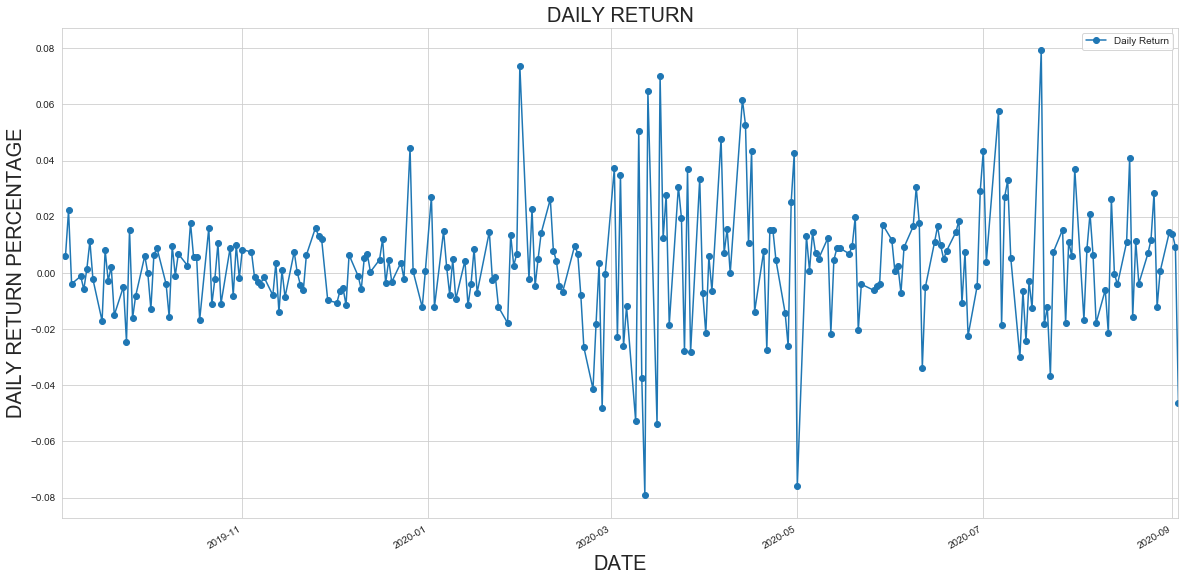

In [20]:
# plot of daily return percentage of stock
stock_name['Daily Return'] = stock_name['Close'].pct_change()
stock_name['Daily Return'].plot(figsize=(20,10),legend=True,marker='o')
plt.xlabel('DATE',fontsize=20)
plt.ylabel('DAILY RETURN PERCENTAGE',fontsize=20)
plt.title('DAILY RETURN',fontsize=20)


###### the graph above tells us maximum increase and decrease of the rate of  stock shares

### We have plotted graphs of a year long data that only consisted of day-to-day stock info but now we will get our data at a custom frequency such as 10 minutes, 30 minutes or 2 hours

In [28]:
ALPHA_VANTAGE_API_KEY='SOICO94DAY58EJDL'
day_data = TimeSeries(key=ALPHA_VANTAGE_API_KEY, output_format='pandas')
intraday_data, data_info = day_data.get_intraday(choice, outputsize='full', interval='1min')

In [29]:
intraday_data.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2020-08-21 04:04:00,3301.00,3301.00,3301.00,3301.00,334.0
2020-08-21 04:19:00,3301.00,3301.00,3301.00,3301.00,414.0
2020-08-21 05:45:00,3302.00,3302.00,3302.00,3302.00,230.0
2020-08-21 07:01:00,3295.87,3296.19,3295.87,3296.19,1171.0
2020-08-21 07:02:00,3297.51,3297.51,3297.51,3297.51,328.0


In [30]:
data_info

{'1. Information': 'Intraday (1min) open, high, low, close prices and volume',
 '2. Symbol': 'AMZN',
 '3. Last Refreshed': '2020-09-03 19:59:00',
 '4. Interval': '1min',
 '5. Output Size': 'Full size',
 '6. Time Zone': 'US/Eastern'}

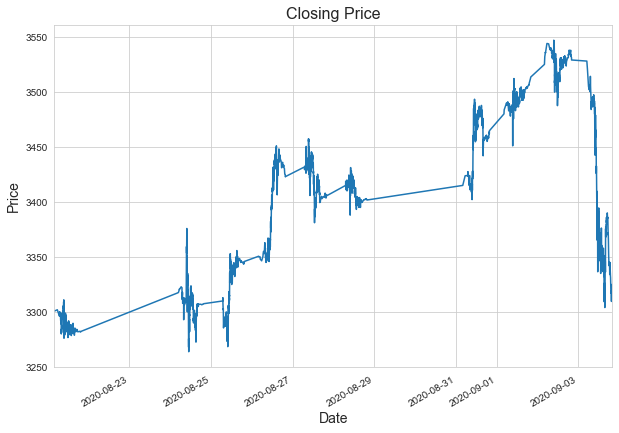

In [31]:
intraday_data['4. close'].plot(figsize=(10,7))
plt.title("Closing Price", fontsize=16)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.show()

In [34]:
ohlcv_dict = {'1. open':'first','2. high':'max','3. low':'min','4. close':'last','5. volume':'sum'}
intraday_data.index = pd.to_datetime(intraday_data.index)
intraday_data_10 = intraday_data.resample('30T').agg(ohlcv_dict)
intraday_data_10.head(10)

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2020-08-21 04:00:00,3301.00,3301.0000,3301.00,3301.0000,748.0
2020-08-21 04:30:00,NaN,NaN,NaN,NaN,0.0
2020-08-21 05:00:00,NaN,NaN,NaN,NaN,0.0
2020-08-21 05:30:00,3302.00,3302.0000,3302.00,3302.0000,230.0
2020-08-21 06:00:00,NaN,NaN,NaN,NaN,0.0
2020-08-21 06:30:00,NaN,NaN,NaN,NaN,0.0
2020-08-21 07:00:00,3295.87,3300.0000,3295.87,3300.0000,4189.0
2020-08-21 07:30:00,3296.21,3296.2100,3290.00,3290.0000,2742.0
2020-08-21 08:00:00,3289.00,3299.3623,3280.00,3287.6900,9463.0


#### above we have made a dataframe of our stock that gives us the data at interval of every 30 minutes

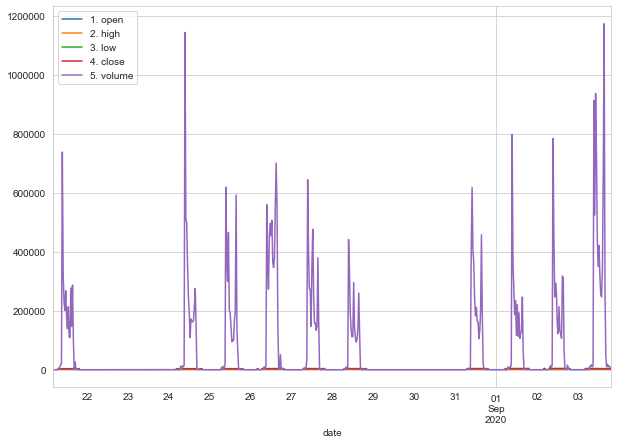

In [36]:
intraday_data_10.plot(figsize=(10,7))

### till now we have seen the visualisations and general info of the stock and now we will calculate the moving average of the stock for multiple time period 

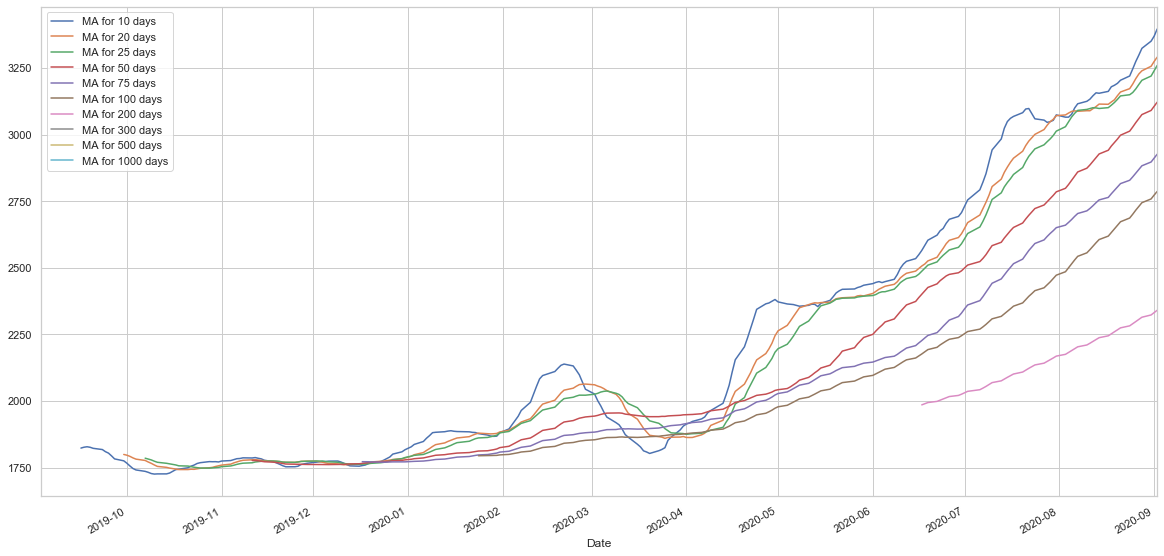

In [356]:
ma_day = [10,20,25,50,75,100,200,300,500,1000]
for ma in ma_day:
    qw= 'MA for %s days' %(str(ma))
    stock_name[qw] = stock_name['Close'].rolling(ma).mean()
stock_name[['MA for 10 days','MA for 20 days','MA for 25 days','MA for 50 days','MA for 75 days','MA for 100 days','MA for 200 days','MA for 300 days','MA for 500 days','MA for 1000 days']].plot(subplots=False,figsize=(20,10))

### till now we have only analysed data of a single stock, but now we will analyse the closing price data of all the stocks

In [357]:
closing_return=closing_data.pct_change()

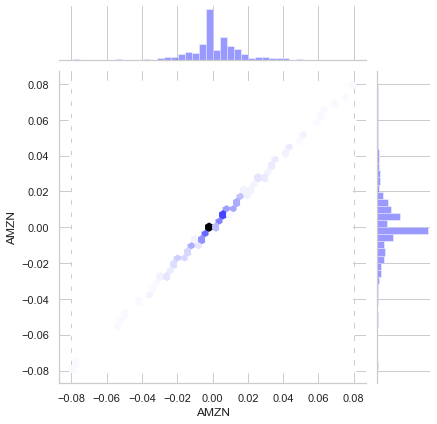

In [358]:
# Comparing AMZN to itself should show a perfectly linear relationship
sns.jointplot('AMZN','AMZN',closing_return,kind='hex',color='blue')
#can use scattter/reg instead of hex

###### now we can compare any two closing stock data and check their co-relativity

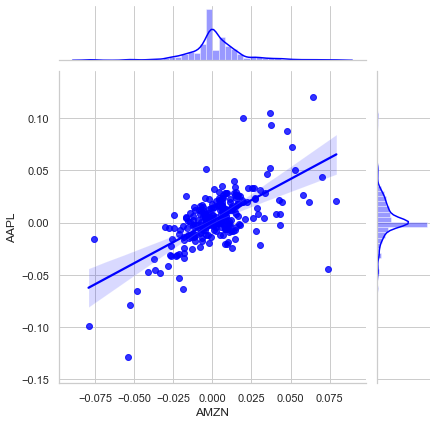

In [359]:
# Comparing AMZN to AAPL 
sns.jointplot('AMZN','AAPL',closing_return,kind='reg',color='blue')

####Finally, we can also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values.

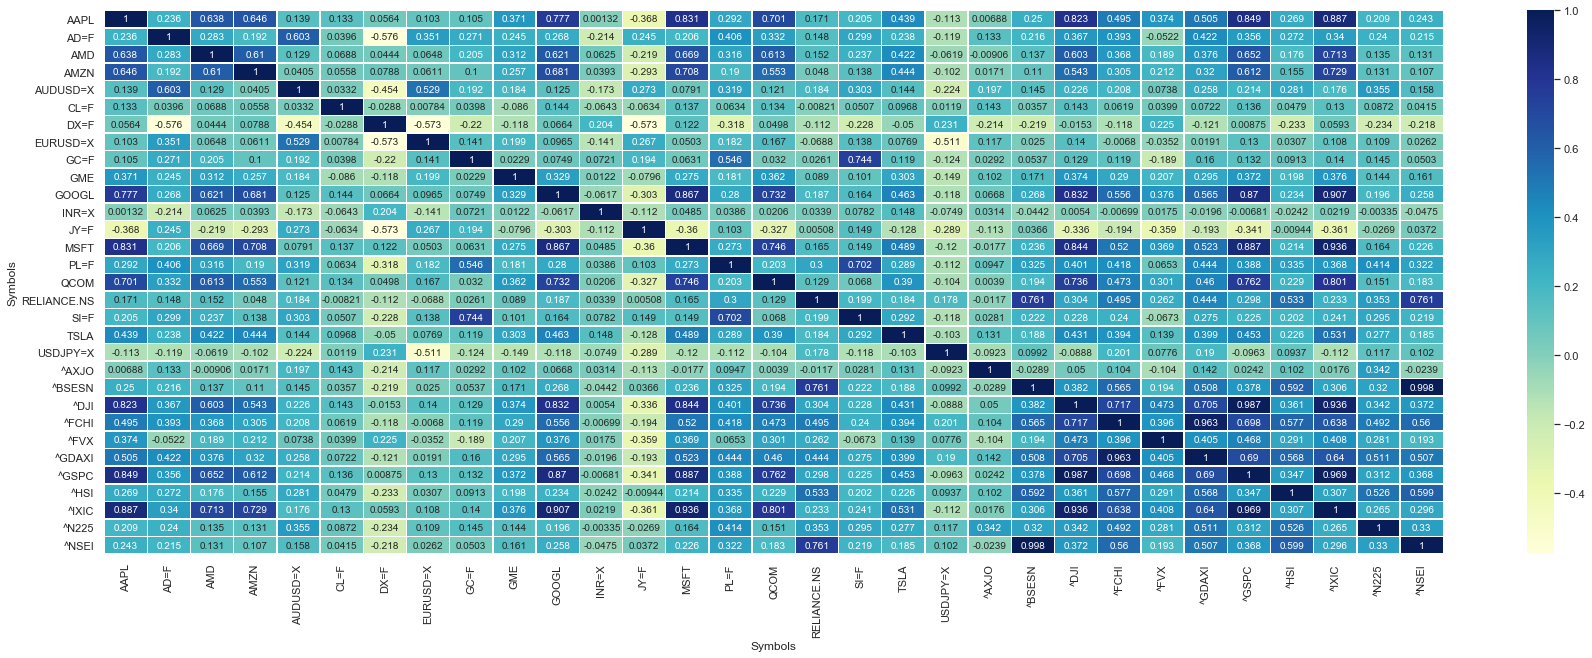

In [375]:
# seaborn for a quick heatmap to get correlation for the daily closing return of the stocks.
plt.figure(figsize = (30,10))
sns.heatmap(closing_return.corr(),annot=True,fmt=".3g",cmap='YlGnBu',linewidths=.5)

#save the 32*32 grid image in the file
plt.savefig('ticker_heatmap.png')

##### Higher the value of cells, means higher the corelativity between the two corresponding stocks

# RISK ANALYSIS 

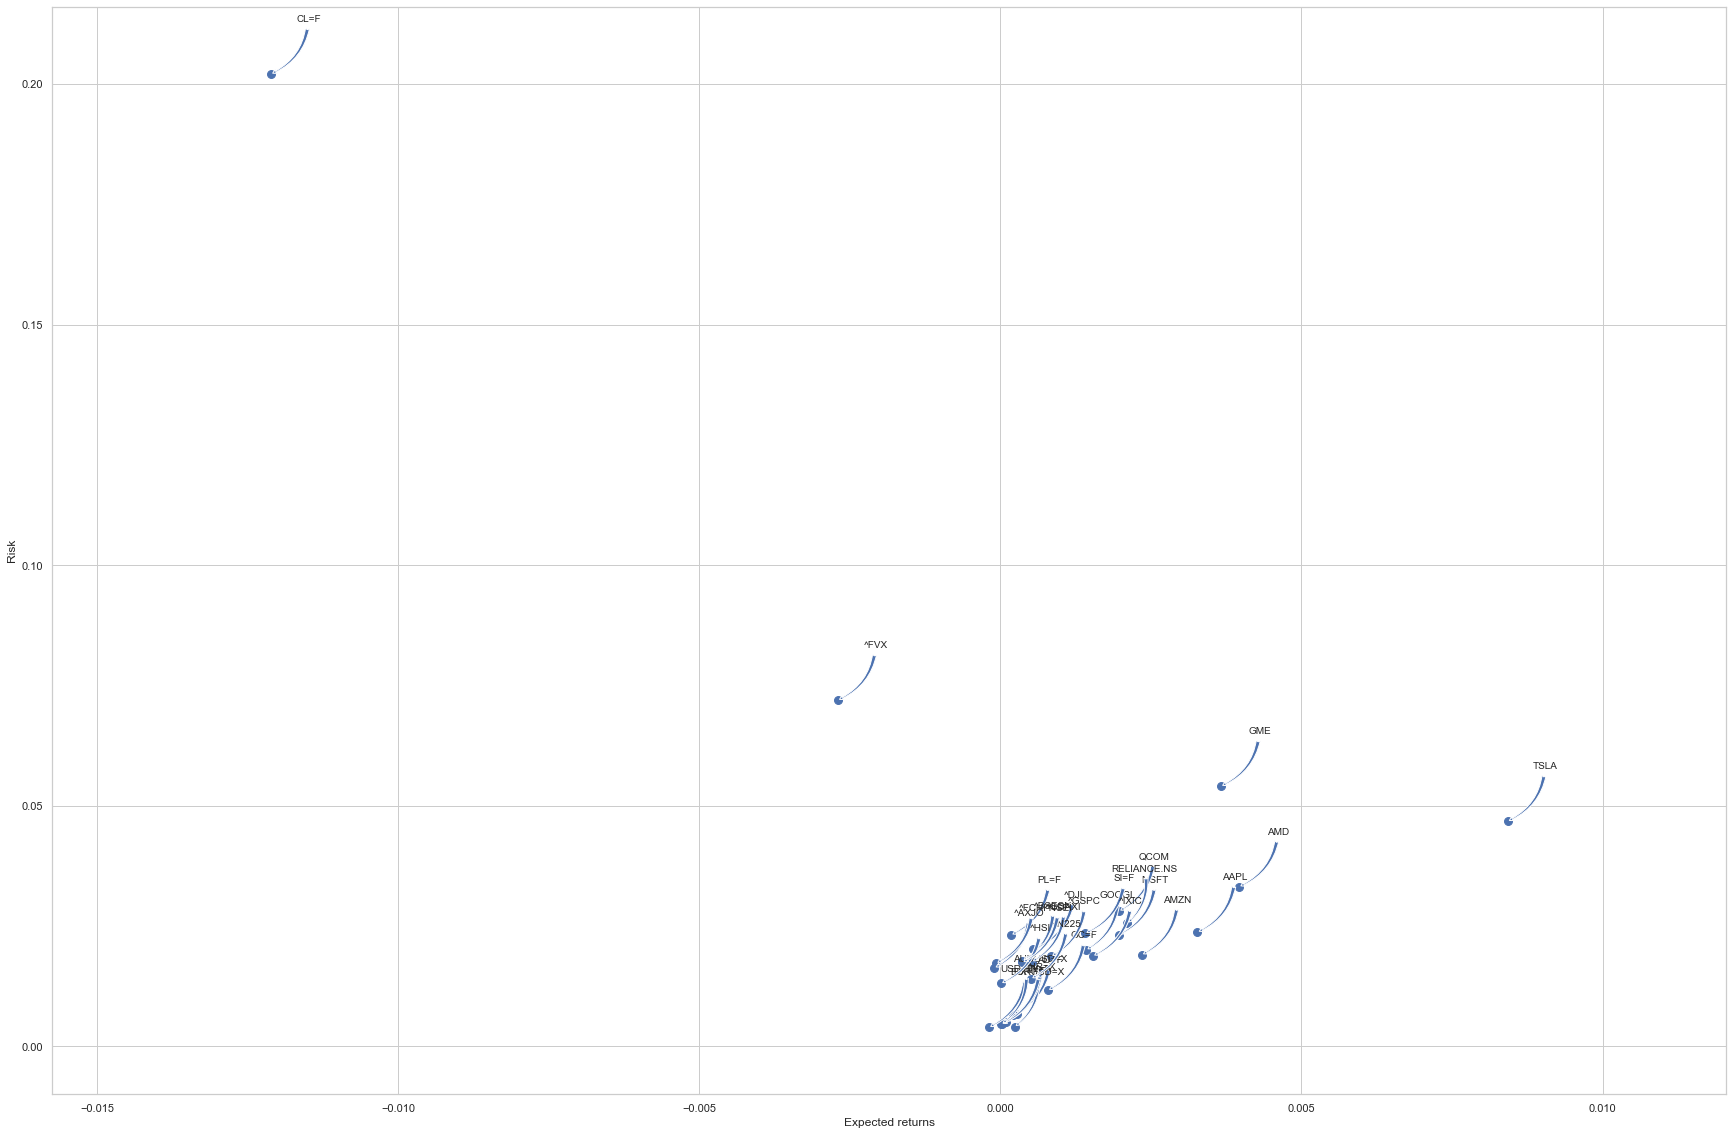

In [377]:
area = np.pi*20
plt.figure(figsize = (30,20))
plt.scatter(return_data.mean(),return_data.std(),s=area)
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(return_data.columns, return_data.mean(), return_data.std()):
    plt.annotate(label,xy=(x,y),xytext=(50,50),textcoords='offset points',ha='right',va='bottom',arrowprops=dict(arrowstyle='fancy',connectionstyle ='arc3,rad=-0.3'))

###### from this graph we can check the risk outcome of stocks

# VALUE AT RISK

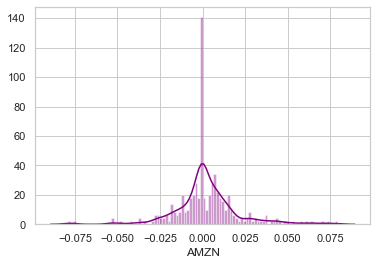

In [362]:
sns.distplot(return_data[choice].dropna(),bins=100,color='purple')

In [363]:
#The 0.05 empirical quantile of daily returns
return_data[choice].quantile(0.05)

-0.02502807367796607

###### The 0.05 empirical quantile of daily returns is at -0.025. That means that with 95% confidence, our worst daily loss will not exceed 2.5%. If we have a 1 million dollar investment in AMZN, our one-day 5% VaR is 0.025 * 1,000,000 = $25,000.

### Value at Risk using the Monte Carlo method

In [364]:
days =end_date-start_date
totdays=days.days
dt= 1/totdays
# let's grab our mu (drift) from the expected return data we got for our selected stock== choice
mu=return_data.mean()[choice]
# let's grab the volatility of the stock from the std() of the average return for our selected stock== choice
sigma=return_data.std()[choice]

In [365]:
def stock_monte_carlo(start_price,totdays,mu,sigma):
    price= np.zeros(totdays)
    price[0] = start_price
    shock=np.zeros(totdays)
    drift=np.zeros(totdays)
    for x in range(1,totdays):
        # Calculate Schock
        shock[x]=np.random.normal(loc=mu*dt, scale=sigma*np.sqrt(dt))
        # Calculate Drift
        drift[x]=mu * dt
        # Calculate Price
        price[x]=price[x-1]+(price[x-1]*(drift[x]+shock[x]))
        
    return price

Text(0.5, 1.0, 'Monte Carlo Analysis for AMZN')

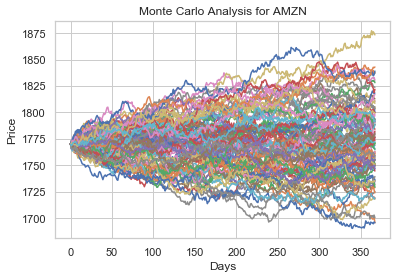

In [366]:
start_price=open_data[choice].dropna()[0]
for run in range(100):
    plt.plot(stock_monte_carlo(start_price,totdays,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title(f'Monte Carlo Analysis for {choice}')

#### let's plot a histogram of the end results of our selected stock==choice==amzn

In [367]:
start_price=open_data[choice].dropna()[0]
runs = 10000
simulations = np.zeros(runs)
for run in range(runs):    
    simulations[run]= stock_monte_carlo(start_price,totdays,mu,sigma)[totdays-1]

Text(0.5, 1.0, 'Final price distribution for AMZN after 368 days')

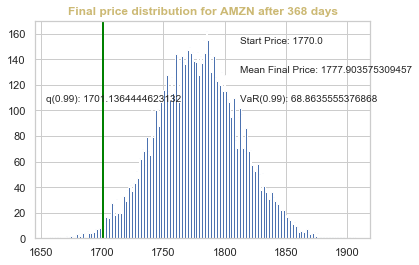

In [368]:
# q is the 1% empirical quantile, this basically means that 99% of the values should fall between here
q=np.percentile(simulations,1)
plt.hist(simulations, bins=200)
plt.figtext(0.6,0.8,s=f'Start Price: {start_price}')
plt.figtext(0.6,0.7,s=f'Mean Final Price: {simulations.mean()}')
plt.figtext(0.6,0.6,s=f'VaR(0.99): {(start_price-q)}')
plt.figtext(0.15, 0.6, s=f"q(0.99): {q}" )
plt.axvline(x=q,linewidth=2, color='green')
plt.title(label=f"Final price distribution for {choice} after {totdays} days", weight='bold', color='Y')


Now we have looked at the 1% empirical quantile of the final price distribution to estimate the Value at Risk for the AMAZON stock(AMZN), which looks to be $68.86 for every investment of 1770 DOLLARS (The price of one initial AMAZON Stock).

This basically means for every initial AMZN stock you purchase you're putting about $68.86 at risk 99% of the time from our Monte Carlo Simulation.

### Now we have analysed data and have learnt how to predict its risk outcome, but now we will predict the value of stock in future
# Stock Predictment

###### following function will download all the historical data of our choosen ticker==AMZN and process it and divide the dataset into train and test sets for furthur analysis

In [49]:
def process_data(choice_ticker,steps=10,future_days=1,shuffle=True):
    scale=True
    choice_columns=['adjclose','volume','open','close','high','low']
    ## get all the stock data using inbuilt library
    ad=si.get_data(choice_ticker)
    ## to return data from this function
    frame={}
    frame['ad']=ad
    for col in choice_columns:
        assert col in ad.columns
    if scale:
        col_scaler={}
        for column in choice_columns:
            scaler=preprocessing.MinMaxScaler()
            ad[column]= scaler.fit_transform(np.expand_dims(ad[column].values,axis=1))
            col_scaler[column]=scaler
        frame["col_scaler"]=col_scaler
    ad['future']=ad['adjclose'].shift(-future_days)
    last_data=np.array(ad[choice_columns].tail(future_days))
    ad.dropna(inplace=True)
    last_row_data=[]
    sequences=deque(maxlen=steps)
    for (entry,target) in zip(ad[choice_columns].values, ad['future'].values):
        sequences.append(entry)
        if len(sequences)==steps:
            last_row_data.append([np.array(sequences),target])
    last_data=list(sequences)+list(last_data)
    last_data=np.array(last_data)
    frame['last_data']=last_data
    x,y=[],[]
    for seq, target in last_row_data:
        x.append(seq)
        y.append(target)
    x=np.array(x)
    y=np.array(y)
    x=x.reshape((x.shape[0],x.shape[2],x.shape[1]))
    frame["x_train"],frame["x_test"],frame["y_train"],frame["y_test"]=train_test_split(x,y,test_size=0.2,shuffle=shuffle)
    return frame

###### After loading the train and test set, we have to build a model to prepare and analyse the dataset 

In [42]:
def create_model(sequence_length,cell=LSTM,layers=2,dropout=0.2):
    model=Sequential()
    bidirectional=False
    for i in range(layers):
        if i==0:
            if bidirectional:
                model.add(Bidirectional(cell(256,return_sequences=True),input_shape=(None,sequence_length)))
            else:
                model.add(cell(256,return_sequences=True,input_shape=(None,sequence_length)))
        elif i==layers-1:
            if bidirectional:
                model.add(Bidirectional(cell(256,return_sequences=False)))
            else:
                model.add(cell(256,return_sequences=False))
        else:
            if bidirectional:
                model.add(Bidirectional(cell(256,return_sequences=True)))
            else:
                model.add(cell(256,return_sequences=True))
        model.add(Dropout(dropout))
    model.add(Dense(1, activation="linear"))
    model.compile(loss="huber_loss", metrics=["mean_absolute_error"], optimizer="adam")
    return model

###### following we have initiated the major values for variable that we are going to use to build our model and test the data
###### next we will make 3 folders 'results', 'logs' and 'data' to store our results, model and derived data from the respective models

In [46]:
layers=3
steps=70
future_days=30
cell=LSTM
dropout=0.4
batch_size=64
EPOCHS=400
ticker="AMZN"
##to use mean squared mean and mean squared error for the loss function we have to 
ticker_data_filename=os.path.join("data", f"{ticker}_{date.today()}.csv")
model_name= f"{date.today()}_{ticker}-{cell.__name__}-seq-{steps}-step-{future_days}-layers-{layers}"
if False:
    model_name += "-b"
if not os.path.isdir("results"):
    os.mkdir("results")
if not os.path.isdir("logs"):
    os.mkdir("logs")
if not os.path.isdir("data"):
    os.mkdir("data")

###### we will now use our previously derived functions and train the model and save the results and model in the previously creatly folders

In [47]:
data= process_data(ticker,steps,future_days)
data["ad"].to_csv(ticker_data_filename)
model=create_model(steps,cell,layers,dropout)
checkpointer=ModelCheckpoint(os.path.join("results",model_name+".h5"), save_weights_only=True,save_best_only=True,verbose=1)
tensorboard=TensorBoard(log_dir=os.path.join("logs",model_name))
history=model.fit(data["x_train"],data["y_train"],batch_size=batch_size,epochs=EPOCHS,validation_data=(data["x_test"],data["y_test"]),callbacks=[checkpointer, tensorboard],verbose=1)
model.save(os.path.join("results",model_name)+".h5")

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 4614 samples, validate on 1154 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/400
4608/4614 [============================>.] - ETA: 0s - loss: 0.0015 - mean_absolute_error: 0.0276
Epoch 00001: val_loss improved from inf to 0.00154, saving model to results\2020-09-04_AMZN-LSTM-seq-70-step-30-layers-3.h5
4614/4614 [==============================] - 11s 2ms/sample - loss: 0.0015 - mean_absolute_error: 0.0276 - val_loss: 0.0015 - val_mean_absolute_error: 0.0266
Epoch 2/400
4608/4614 [============================>.] - ETA: 0s - loss: 9.8245e-04 - mean_absolute_error: 0.0207
Epoch 00002: val_loss improved from 0.00154 to 0.00096, saving model to results\2020-09-04_AMZN-LSTM-seq-70-step-30-layers-3.h5
4614/4614 [==============================] - 8s 2ms/sample - loss: 9.8602e-04 - mean_absolute_error: 0.020

4608/4614 [============================>.] - ETA: 0s - loss: 2.6407e-04 - mean_absolute_error: 0.0129
Epoch 00045: val_loss did not improve from 0.00016
4614/4614 [==============================] - 8s 2ms/sample - loss: 2.6465e-04 - mean_absolute_error: 0.0129 - val_loss: 1.6381e-04 - val_mean_absolute_error: 0.0094
Epoch 46/400
4608/4614 [============================>.] - ETA: 0s - loss: 2.9631e-04 - mean_absolute_error: 0.0136
Epoch 00046: val_loss improved from 0.00016 to 0.00016, saving model to results\2020-09-04_AMZN-LSTM-seq-70-step-30-layers-3.h5
4614/4614 [==============================] - 8s 2ms/sample - loss: 2.9607e-04 - mean_absolute_error: 0.0136 - val_loss: 1.5820e-04 - val_mean_absolute_error: 0.0092
Epoch 47/400
4608/4614 [============================>.] - ETA: 0s - loss: 3.1400e-04 - mean_absolute_error: 0.0133
Epoch 00047: val_loss improved from 0.00016 to 0.00016, saving model to results\2020-09-04_AMZN-LSTM-seq-70-step-30-layers-3.h5
4614/4614 [====================

Epoch 69/400
4608/4614 [============================>.] - ETA: 0s - loss: 2.2197e-04 - mean_absolute_error: 0.0120
Epoch 00069: val_loss did not improve from 0.00013
4614/4614 [==============================] - 8s 2ms/sample - loss: 2.2173e-04 - mean_absolute_error: 0.0120 - val_loss: 1.7721e-04 - val_mean_absolute_error: 0.0113
Epoch 70/400
4608/4614 [============================>.] - ETA: 0s - loss: 2.5559e-04 - mean_absolute_error: 0.0128
Epoch 00070: val_loss did not improve from 0.00013
4614/4614 [==============================] - 8s 2ms/sample - loss: 2.5534e-04 - mean_absolute_error: 0.0128 - val_loss: 3.2936e-04 - val_mean_absolute_error: 0.0118
Epoch 71/400
4608/4614 [============================>.] - ETA: 0s - loss: 2.4175e-04 - mean_absolute_error: 0.0122
Epoch 00071: val_loss did not improve from 0.00013
4614/4614 [==============================] - 8s 2ms/sample - loss: 2.4184e-04 - mean_absolute_error: 0.0122 - val_loss: 1.8708e-04 - val_mean_absolute_error: 0.0102
Epoch 7

Epoch 94/400
4608/4614 [============================>.] - ETA: 0s - loss: 2.1892e-04 - mean_absolute_error: 0.0122
Epoch 00094: val_loss did not improve from 0.00012
4614/4614 [==============================] - 8s 2ms/sample - loss: 2.1872e-04 - mean_absolute_error: 0.0122 - val_loss: 1.3626e-04 - val_mean_absolute_error: 0.0090
Epoch 95/400
4608/4614 [============================>.] - ETA: 0s - loss: 2.0976e-04 - mean_absolute_error: 0.0120
Epoch 00095: val_loss did not improve from 0.00012
4614/4614 [==============================] - 8s 2ms/sample - loss: 2.0955e-04 - mean_absolute_error: 0.0120 - val_loss: 1.9381e-04 - val_mean_absolute_error: 0.0126
Epoch 96/400
4608/4614 [============================>.] - ETA: 0s - loss: 2.3904e-04 - mean_absolute_error: 0.0124
Epoch 00096: val_loss did not improve from 0.00012
4614/4614 [==============================] - 8s 2ms/sample - loss: 2.3877e-04 - mean_absolute_error: 0.0124 - val_loss: 1.4674e-04 - val_mean_absolute_error: 0.0080
Epoch 9

4608/4614 [============================>.] - ETA: 0s - loss: 2.2648e-04 - mean_absolute_error: 0.0121
Epoch 00142: val_loss did not improve from 0.00010
4614/4614 [==============================] - 8s 2ms/sample - loss: 2.2624e-04 - mean_absolute_error: 0.0121 - val_loss: 1.4396e-04 - val_mean_absolute_error: 0.0086
Epoch 143/400
4608/4614 [============================>.] - ETA: 0s - loss: 2.2328e-04 - mean_absolute_error: 0.0123
Epoch 00143: val_loss did not improve from 0.00010
4614/4614 [==============================] - 8s 2ms/sample - loss: 2.2311e-04 - mean_absolute_error: 0.0123 - val_loss: 1.1147e-04 - val_mean_absolute_error: 0.0081
Epoch 144/400
4608/4614 [============================>.] - ETA: 0s - loss: 1.9981e-04 - mean_absolute_error: 0.0115
Epoch 00144: val_loss did not improve from 0.00010
4614/4614 [==============================] - 8s 2ms/sample - loss: 1.9968e-04 - mean_absolute_error: 0.0115 - val_loss: 1.3823e-04 - val_mean_absolute_error: 0.0090
Epoch 145/400
4608

Epoch 167/400
4608/4614 [============================>.] - ETA: 0s - loss: 1.8572e-04 - mean_absolute_error: 0.0114
Epoch 00167: val_loss did not improve from 0.00009
4614/4614 [==============================] - 8s 2ms/sample - loss: 1.8562e-04 - mean_absolute_error: 0.0114 - val_loss: 9.7978e-05 - val_mean_absolute_error: 0.0076
Epoch 168/400
4608/4614 [============================>.] - ETA: 0s - loss: 1.9441e-04 - mean_absolute_error: 0.0116
Epoch 00168: val_loss did not improve from 0.00009
4614/4614 [==============================] - 8s 2ms/sample - loss: 1.9420e-04 - mean_absolute_error: 0.0116 - val_loss: 1.3672e-04 - val_mean_absolute_error: 0.0086
Epoch 169/400
4608/4614 [============================>.] - ETA: 0s - loss: 1.9831e-04 - mean_absolute_error: 0.0116
Epoch 00169: val_loss did not improve from 0.00009
4614/4614 [==============================] - 8s 2ms/sample - loss: 1.9816e-04 - mean_absolute_error: 0.0116 - val_loss: 1.1044e-04 - val_mean_absolute_error: 0.0075
Epoc

Epoch 192/400
4608/4614 [============================>.] - ETA: 0s - loss: 2.0633e-04 - mean_absolute_error: 0.0115
Epoch 00192: val_loss did not improve from 0.00008
4614/4614 [==============================] - 8s 2ms/sample - loss: 2.0609e-04 - mean_absolute_error: 0.0115 - val_loss: 1.8696e-04 - val_mean_absolute_error: 0.0086
Epoch 193/400
4608/4614 [============================>.] - ETA: 0s - loss: 2.2180e-04 - mean_absolute_error: 0.0117
Epoch 00193: val_loss did not improve from 0.00008
4614/4614 [==============================] - 8s 2ms/sample - loss: 2.2172e-04 - mean_absolute_error: 0.0117 - val_loss: 2.1654e-04 - val_mean_absolute_error: 0.0091
Epoch 194/400
4608/4614 [============================>.] - ETA: 0s - loss: 1.8917e-04 - mean_absolute_error: 0.0115
Epoch 00194: val_loss did not improve from 0.00008
4614/4614 [==============================] - 8s 2ms/sample - loss: 1.8959e-04 - mean_absolute_error: 0.0115 - val_loss: 1.0571e-04 - val_mean_absolute_error: 0.0078
Epoc

Epoch 241/400
4608/4614 [============================>.] - ETA: 0s - loss: 1.8675e-04 - mean_absolute_error: 0.0114
Epoch 00241: val_loss did not improve from 0.00008
4614/4614 [==============================] - 8s 2ms/sample - loss: 1.8852e-04 - mean_absolute_error: 0.0114 - val_loss: 1.6150e-04 - val_mean_absolute_error: 0.0101
Epoch 242/400
4608/4614 [============================>.] - ETA: 0s - loss: 3.7135e-04 - mean_absolute_error: 0.0142
Epoch 00242: val_loss did not improve from 0.00008
4614/4614 [==============================] - 8s 2ms/sample - loss: 3.7237e-04 - mean_absolute_error: 0.0142 - val_loss: 1.8624e-04 - val_mean_absolute_error: 0.0120
Epoch 243/400
4608/4614 [============================>.] - ETA: 0s - loss: 3.4709e-04 - mean_absolute_error: 0.0146
Epoch 00243: val_loss did not improve from 0.00008
4614/4614 [==============================] - 8s 2ms/sample - loss: 3.4685e-04 - mean_absolute_error: 0.0146 - val_loss: 1.9171e-04 - val_mean_absolute_error: 0.0090
Epoc

Epoch 266/400
4608/4614 [============================>.] - ETA: 0s - loss: 1.8792e-04 - mean_absolute_error: 0.0117
Epoch 00266: val_loss did not improve from 0.00008
4614/4614 [==============================] - 9s 2ms/sample - loss: 1.8771e-04 - mean_absolute_error: 0.0116 - val_loss: 8.2229e-05 - val_mean_absolute_error: 0.0070
Epoch 267/400
4608/4614 [============================>.] - ETA: 0s - loss: 2.2976e-04 - mean_absolute_error: 0.0124
Epoch 00267: val_loss did not improve from 0.00008
4614/4614 [==============================] - 8s 2ms/sample - loss: 2.2964e-04 - mean_absolute_error: 0.0124 - val_loss: 1.0967e-04 - val_mean_absolute_error: 0.0085
Epoch 268/400
4608/4614 [============================>.] - ETA: 0s - loss: 1.7152e-04 - mean_absolute_error: 0.0112
Epoch 00268: val_loss did not improve from 0.00008
4614/4614 [==============================] - 8s 2ms/sample - loss: 1.7134e-04 - mean_absolute_error: 0.0112 - val_loss: 8.2293e-05 - val_mean_absolute_error: 0.0079
Epoc

4608/4614 [============================>.] - ETA: 0s - loss: 1.6591e-04 - mean_absolute_error: 0.0108
Epoch 00314: val_loss did not improve from 0.00006
4614/4614 [==============================] - 8s 2ms/sample - loss: 1.6584e-04 - mean_absolute_error: 0.0108 - val_loss: 6.9526e-05 - val_mean_absolute_error: 0.0075
Epoch 315/400
4608/4614 [============================>.] - ETA: 0s - loss: 1.4236e-04 - mean_absolute_error: 0.0102
Epoch 00315: val_loss did not improve from 0.00006
4614/4614 [==============================] - 8s 2ms/sample - loss: 1.4304e-04 - mean_absolute_error: 0.0102 - val_loss: 1.9545e-04 - val_mean_absolute_error: 0.0091
Epoch 316/400
4608/4614 [============================>.] - ETA: 0s - loss: 1.6990e-04 - mean_absolute_error: 0.0108
Epoch 00316: val_loss did not improve from 0.00006
4614/4614 [==============================] - 8s 2ms/sample - loss: 1.6976e-04 - mean_absolute_error: 0.0108 - val_loss: 9.2358e-05 - val_mean_absolute_error: 0.0067
Epoch 317/400
4608

Epoch 339/400
4608/4614 [============================>.] - ETA: 0s - loss: 1.4900e-04 - mean_absolute_error: 0.0105
Epoch 00339: val_loss did not improve from 0.00006
4614/4614 [==============================] - 9s 2ms/sample - loss: 1.4893e-04 - mean_absolute_error: 0.0105 - val_loss: 6.4037e-05 - val_mean_absolute_error: 0.0071
Epoch 340/400
4608/4614 [============================>.] - ETA: 0s - loss: 2.0911e-04 - mean_absolute_error: 0.0115
Epoch 00340: val_loss did not improve from 0.00006
4614/4614 [==============================] - 8s 2ms/sample - loss: 2.0899e-04 - mean_absolute_error: 0.0115 - val_loss: 2.0939e-04 - val_mean_absolute_error: 0.0089
Epoch 341/400
4608/4614 [============================>.] - ETA: 0s - loss: 1.6663e-04 - mean_absolute_error: 0.0108
Epoch 00341: val_loss did not improve from 0.00006
4614/4614 [==============================] - 8s 2ms/sample - loss: 1.6657e-04 - mean_absolute_error: 0.0108 - val_loss: 6.4686e-05 - val_mean_absolute_error: 0.0066
Epoc

Epoch 388/400
4608/4614 [============================>.] - ETA: 0s - loss: 1.5503e-04 - mean_absolute_error: 0.0103
Epoch 00388: val_loss did not improve from 0.00005
4614/4614 [==============================] - 8s 2ms/sample - loss: 1.5486e-04 - mean_absolute_error: 0.0103 - val_loss: 8.7256e-05 - val_mean_absolute_error: 0.0072
Epoch 389/400
4608/4614 [============================>.] - ETA: 0s - loss: 1.1973e-04 - mean_absolute_error: 0.0097
Epoch 00389: val_loss did not improve from 0.00005
4614/4614 [==============================] - 8s 2ms/sample - loss: 1.1975e-04 - mean_absolute_error: 0.0097 - val_loss: 8.1505e-05 - val_mean_absolute_error: 0.0069
Epoch 390/400
4608/4614 [============================>.] - ETA: 0s - loss: 1.2463e-04 - mean_absolute_error: 0.0097
Epoch 00390: val_loss did not improve from 0.00005
4614/4614 [==============================] - 8s 2ms/sample - loss: 1.2448e-04 - mean_absolute_error: 0.0097 - val_loss: 5.5889e-05 - val_mean_absolute_error: 0.0075
Epoc

###### As we saw earlier duting training of the model, the Mean Absolute Error(mae) and Mean Squared Error(mse) were in between 0 and 1 , so we need to get its original value

In [51]:
mse, mae = model.evaluate(data["x_test"], data["y_test"],verbose=0)
mean_absolute_error=data["col_scaler"]["adjclose"].inverse_transform([[mae]])[0][0]
mean_squared_error=data["col_scaler"]["adjclose"].inverse_transform([[mse]])[0][0]
print("Mean Absolute Error:", mean_absolute_error)
print("Mean Squared Error:", mean_squared_error)

Mean Absolute Error: 27.942681915223734
Mean Squared Error: 1.768914945295665


###### so this mens that in average predicted price gives an error of 27.94 dollars in compare to the actual price of stock

###### After training our model and getting the mae value we now will want to predict the price of our stock for the upcoming days

In [52]:
def predict(model, data):
    last_data=data["last_data"][-steps:]
    col_scaler=data["col_scaler"]
    last_data=last_data.reshape((last_data.shape[1],last_data.shape[0]))
    last_data=np.expand_dims(last_data,axis=0)
    prediction=model.predict(last_data)
    predicted=col_scaler["adjclose"].inverse_transform(prediction)[0][0]
    return predicted

In [53]:
future_price=predict(model, data)
print(f"Future price after {future_days} days is {future_price:.2f}$")

Future price after 30 days is 3511.56$


###### Now, lets plot the graph of actual and predicted price of our stock 
###### Also, we would want to know that how accurate our model is so we have made another function to calculate the accuracy of our model

In [54]:
def plot_graph(model, data):
    y_test=data["y_test"]
    x_test=data["x_test"]
    y_pred=model.predict(x_test)
    y_test=np.squeeze(data["col_scaler"]["adjclose"].inverse_transform(np.expand_dims(y_test,axis=0)))
    y_pred=np.squeeze(data["col_scaler"]["adjclose"].inverse_transform(y_pred))
    plt.plot(y_test[-200:],c='b')
    plt.plot(y_pred[-200:],c='r')
    plt.xlabel("Days")
    plt.ylabel("Price")
    plt.legend(["Actual Price","Predicted Price"])
    plt.figure(figsize=(20,10))
    plt.show()

In [58]:
def get_accuracy(model, data):
    y_test=data["y_test"]
    x_test=data["x_test"]
    y_pred=model.predict(x_test)
    y_test=np.squeeze(data["col_scaler"]["adjclose"].inverse_transform(np.expand_dims(y_test,axis=0)))
    y_pred=np.squeeze(data["col_scaler"]["adjclose"].inverse_transform(y_pred))
    y_pred=list(map(lambda current,future:int(float(future) >float(current)),y_test[:-future_days], y_pred[future_days:]))
    y_test=list(map(lambda current,future:int(float(future) >float(current)),y_test[:-future_days], y_test[future_days:]))
    return accuracy_score(y_test, y_pred)

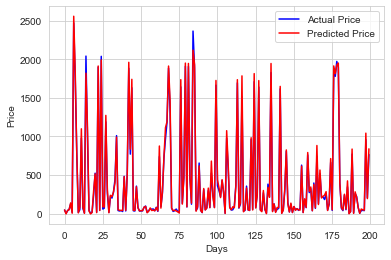

<Figure size 1440x720 with 0 Axes>

In [59]:
plot_graph(model, data)

In [60]:
print(str(future_days)+":","Accuracy Score:",get_accuracy(model,data))

30: Accuracy Score: 0.9741992882562278


#### Thus, our model to predict the value of our desired stock after 30 days gives us an accuracy of 97.4%
#### It means, with 97.4% confidence I can say that after 30 days the closing price of our stock will be 3511.56$